# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [62]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

# 2. Collect and load data

In [63]:
df = pd.read_csv('bigcity.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


Unnecessary column has been removed.

# 3. Explore numeric variables - five number summary

In [64]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


As we can see mean > median(50%) , so we can say that there are some outliers in the columns.

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

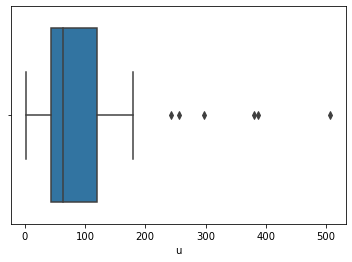

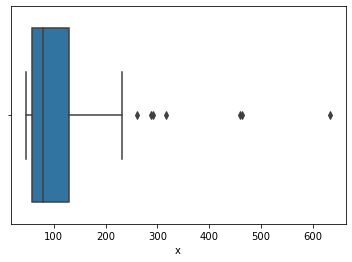

In [65]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

Here we can see the outliers in the right side of the data.

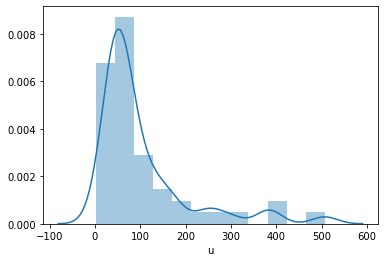

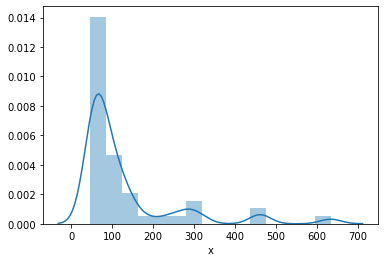

In [66]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

As we know already know there are some outliers in the data, the data is right skewed in nature

In [67]:
df.var()

u    10900.416667
x    15158.832483
dtype: float64

In [68]:
df.std()

u    104.405061
x    123.121211
dtype: float64

Fro the variance and standard deviation also we can say that the data is varying a lot

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

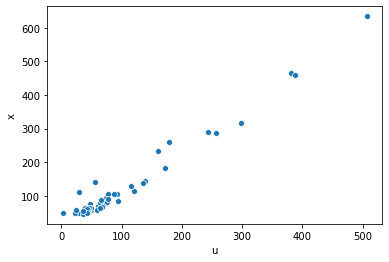

In [69]:
sns.scatterplot(df['u'],df['x'])

From the scatterplot we can say the input variable is highly correlated to target variable.

In [70]:
pd.crosstab(df['u'],df['x'])

x,46,48,50,52,53,54,57,58,60,61,...,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [71]:
df.shape

(49, 2)

There are 49 rows and 2 columns in the dataset.

In [72]:
x = df['u']
y = df['x']

x is my input and y is my output.

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [73]:
df.isna().sum()

u    0
x    0
dtype: int64

There is no missing or null values present in the dataset.

In [74]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


From the correlation matrix , we can say that input variable is highly correlated with output variable.

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=48)
xtrain = xtrain.values.reshape(-1,1)
xtest = xtest.values.reshape(-1,1)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(39, 1)
(39,)
(10, 1)
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [76]:
lr = LinearRegression()
lr_mod = lr.fit(xtrain,ytrain)
print('The coefficient of the input variable (b1) is',lr_mod.coef_[0])
print('The intercept value is',lr_mod.intercept_)

The coefficient of the input variable (b1) is 1.1898529574414587
The intercept value is 2.31035285049866


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

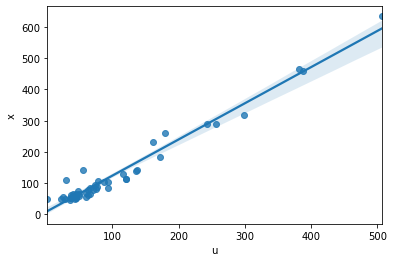

In [77]:
sns.regplot(x,y)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [78]:
ypred = lr_mod.predict(xtest)
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
print('The R-square value of the model is',r2)
print('The RMSE value of the model is',rmse)

The R-square value of the model is 0.9330538126741319
The RMSE value of the model is 33.95921689487067


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [79]:
print('Accuracy of the model for train data is',lr_mod.score(xtrain,ytrain))
print('Accuracy of the model for test data is',lr_mod.score(xtest,ytest))

Accuracy of the model for train data is 0.9709915109809382
Accuracy of the model for test data is 0.9330538126741319
